In [48]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Import custom functions to extract our Image arrays and Pixel Mask arrays from our created fits files dataset
from dataGathering import extractImageArray, extractPixelMaskArray, extract_star_catalog, getStarData, getImagePlot, getPixelMaskPlot, displayImagePlot, displayPixelMaskPlot

# Import astropy to read fits files, and os to interact with the file system
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import os

In [31]:
# Create images and masks arrays lists
images = []
masks = []

# Create df to store the star data inside each fits file
star_data = []

# Createa a list of all the wcs data in the dataset folder
wcs_data = []

# Create a list of all the fits files in the dataset folder
fits_files = os.listdir('data/')

# For all the fits files in the dataset folder specified in file_path, extract the image and mask arrays to the respective lists
file_path = 'data/'
for file in os.listdir(file_path):
    if file.endswith('.fits'):
        images.append(extractImageArray(file_path + file))
        masks.append(extractPixelMaskArray(file_path + file))
        star_data.append(extract_star_catalog(file_path + file))
        wcs_data.append(WCS(fits.open(file_path + file)[0].header))

        print(file + ' added to dataset')

data69.fits added to dataset
data126.fits added to dataset
data129.fits added to dataset
data7.fits added to dataset
data23.fits added to dataset
data32.fits added to dataset
data105.fits added to dataset
data113.fits added to dataset
data20.fits added to dataset
data104.fits added to dataset
data34.fits added to dataset
data122.fits added to dataset
data64.fits added to dataset
data108.fits added to dataset
data138.fits added to dataset
data124.fits added to dataset
data30.fits added to dataset
data131.fits added to dataset
data16.fits added to dataset
data60.fits added to dataset
data103.fits added to dataset
data102.fits added to dataset
data70.fits added to dataset
data15.fits added to dataset
data116.fits added to dataset
data4.fits added to dataset
data142.fits added to dataset
data78.fits added to dataset
data71.fits added to dataset
data68.fits added to dataset
data5.fits added to dataset
data123.fits added to dataset
data19.fits added to dataset
data107.fits added to dataset
d

In [32]:
# Convert lists to numpy arrays
test_images = np.array(images)
test_masks = np.array(masks)

In [33]:
# Ensure the input data has the correct shape
if test_images.ndim == 3:  # If images are grayscale and have shape (num_samples, height, width)
    test_images = np.expand_dims(test_images, axis=-1)  # Add channel dimension
if test_masks.ndim == 3:  # If masks are grayscale and have shape (num_samples, height, width)
    test_masks = np.expand_dims(test_masks, axis=-1)  # Add channel dimension

# Duplicate the single channel across three channels
test_images = np.repeat(test_images, 3, axis=-1)

# Use ImageDataGenerator to load data in batches
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(test_images, test_masks, batch_size=4)

In [34]:
# Load the saved model
model = load_model('150unet_model.keras')

In [35]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9932 - loss: 0.0942
Test Loss: 0.11744245141744614
Test Accuracy: 0.9923288822174072


In [36]:
# Make predictions on new data
predictions = model.predict(test_generator)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [52]:
#Create a function to plot the image, mask and prediction side by side
def plot_image_mask_prediction(selection = 0):
    """
    Plots the image, mask, and prediction for a given selection index.
    Parameters:
    selection (int): The index of the image, mask, and prediction to plot. Default is 0.
    The function extracts the image, mask, and prediction arrays using the provided selection index.
    It then creates a figure with three subplots, each displaying the image, mask, and prediction respectively.
    The subplots are displayed with WCS (World Coordinate System) projection and labeled with RA (Right Ascension) and Dec (Declination).
    """
    image = extractImageArray('data/' + fits_files[selection])
    mask = test_masks[selection].squeeze()
    prediction = predictions[selection].squeeze()
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask, cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(prediction, cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    plt.show()

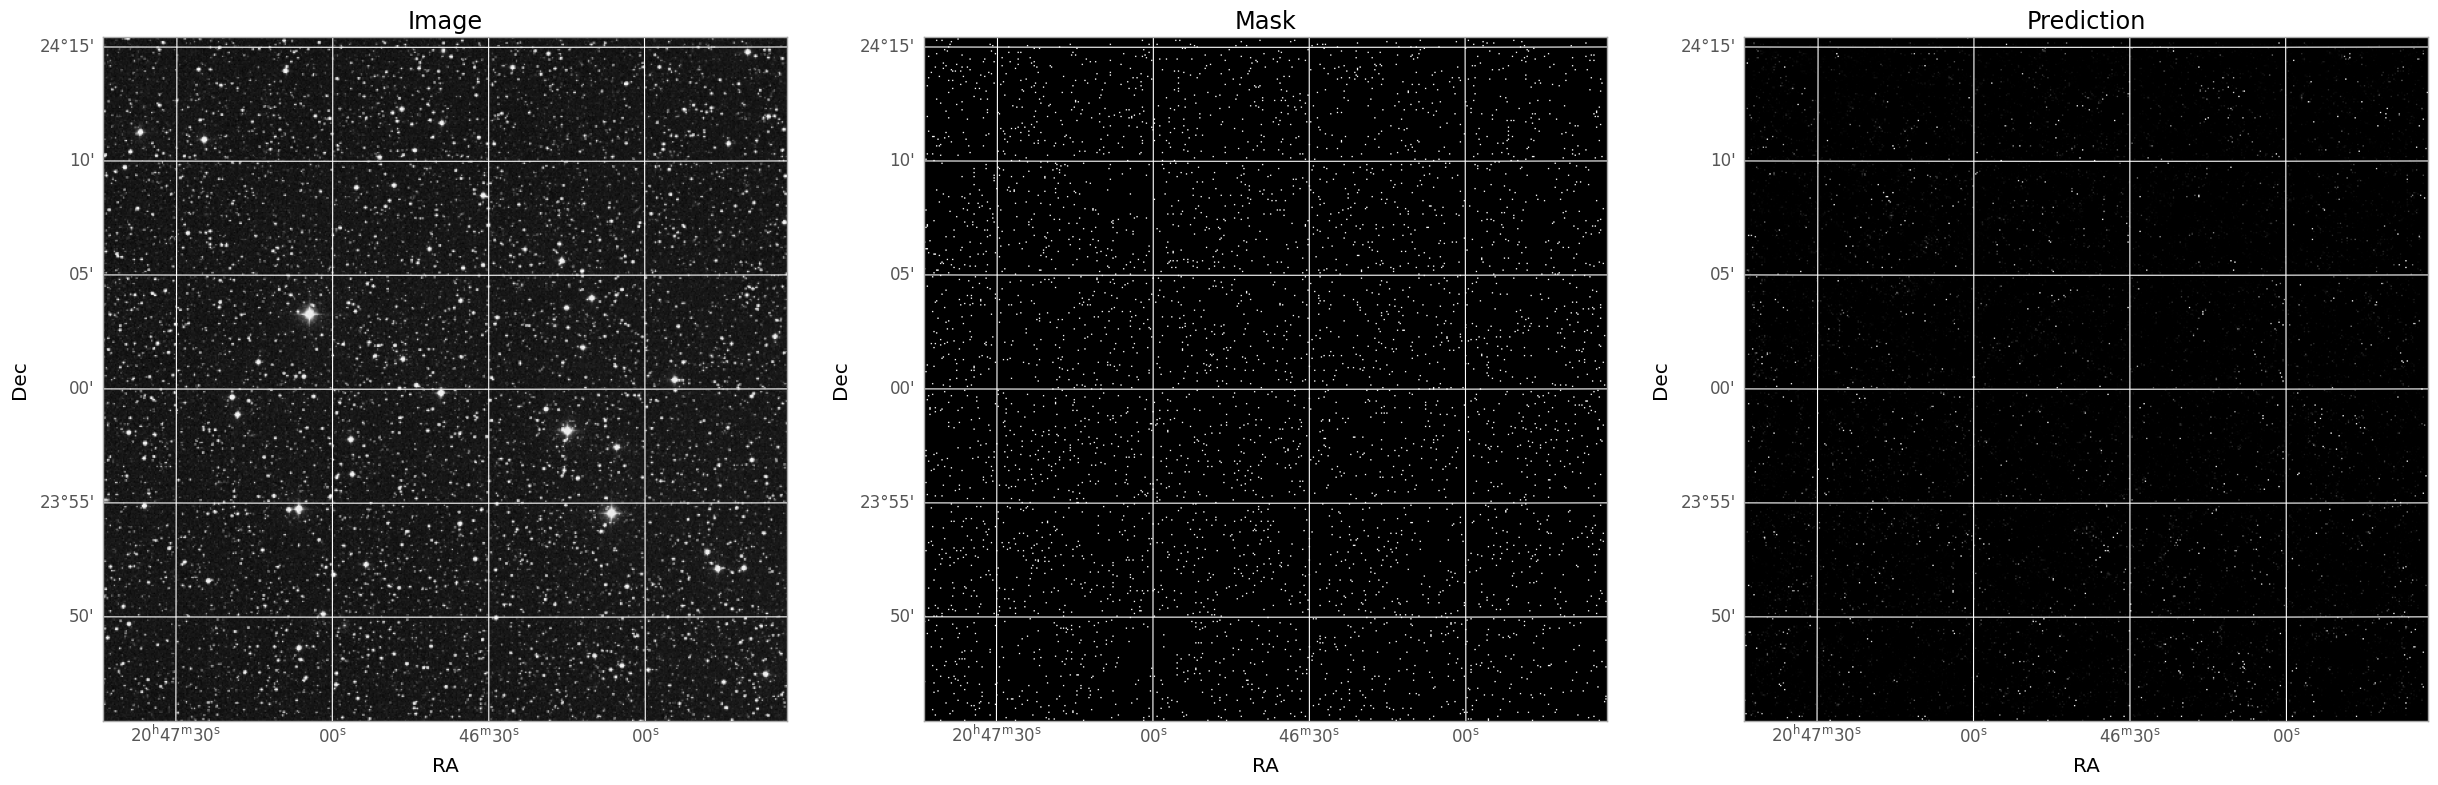

In [68]:
#Plot the 1st image, mask and prediction
plot_image_mask_prediction(1)

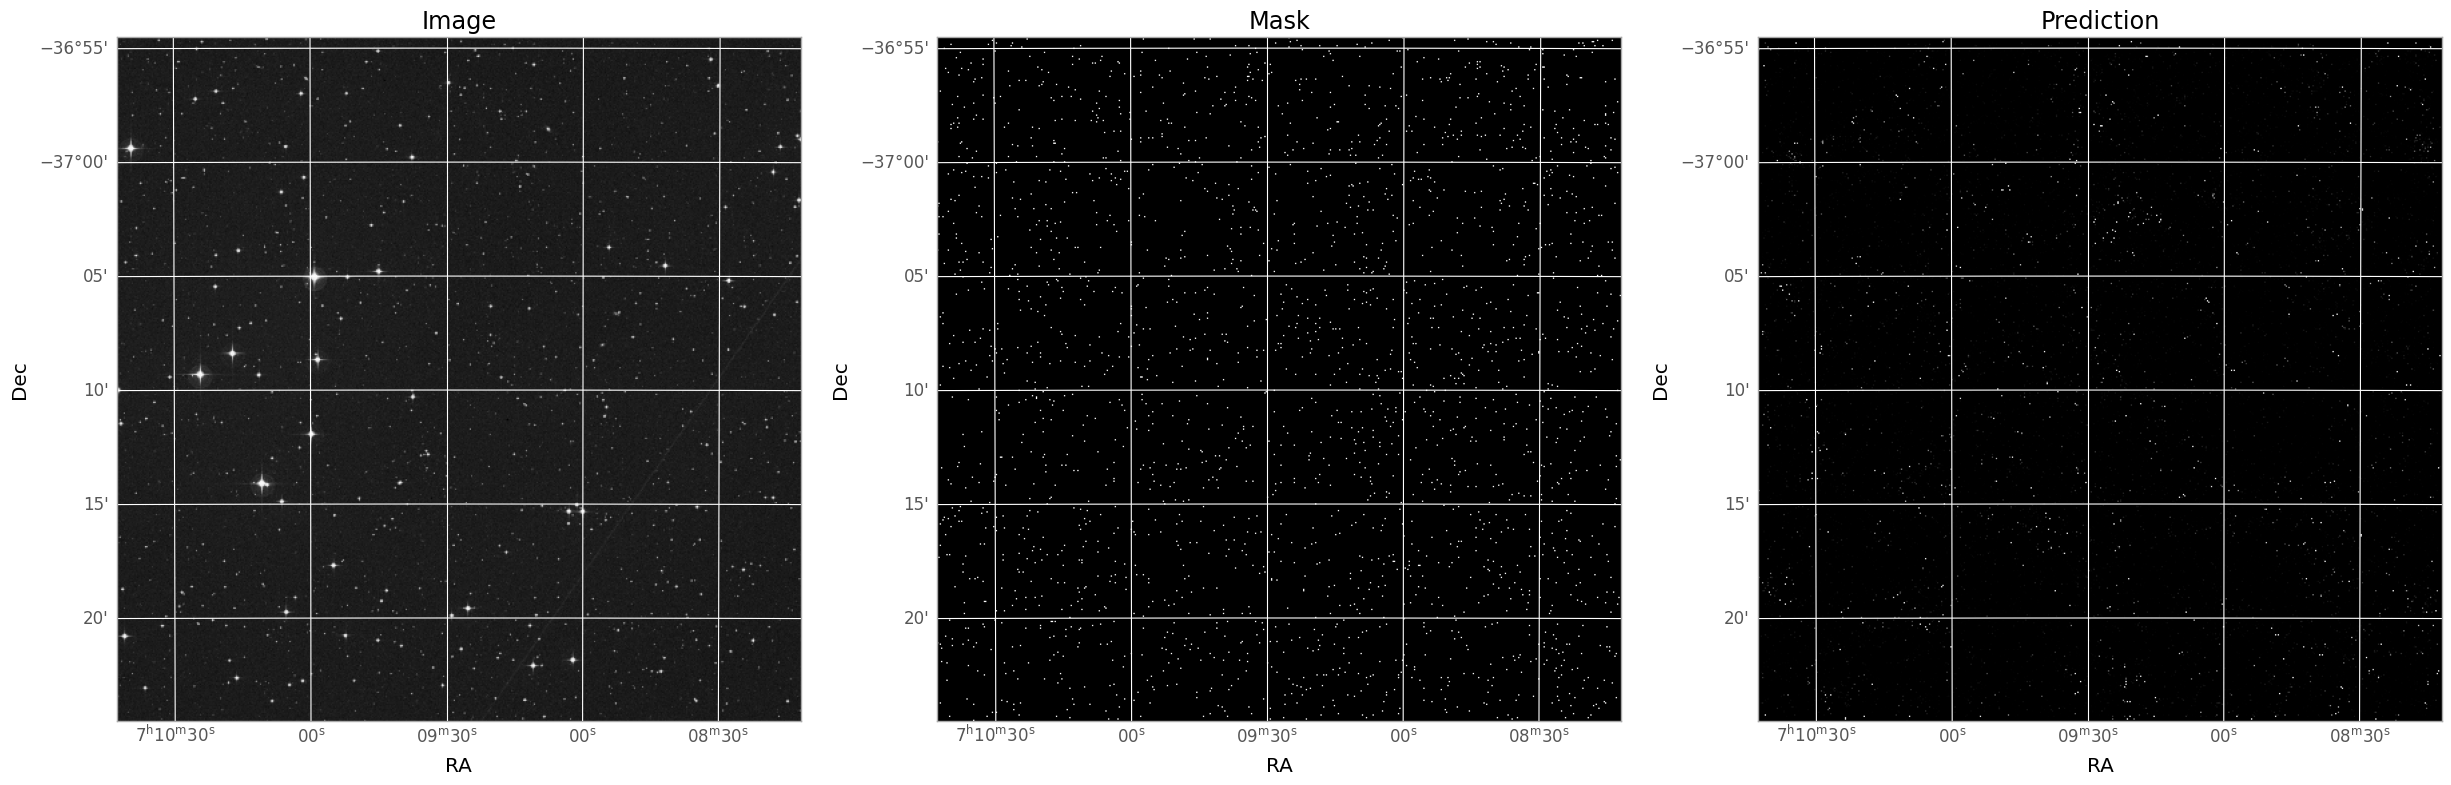

In [66]:
#Plot the 69th image, mask and prediction
plot_image_mask_prediction(69)

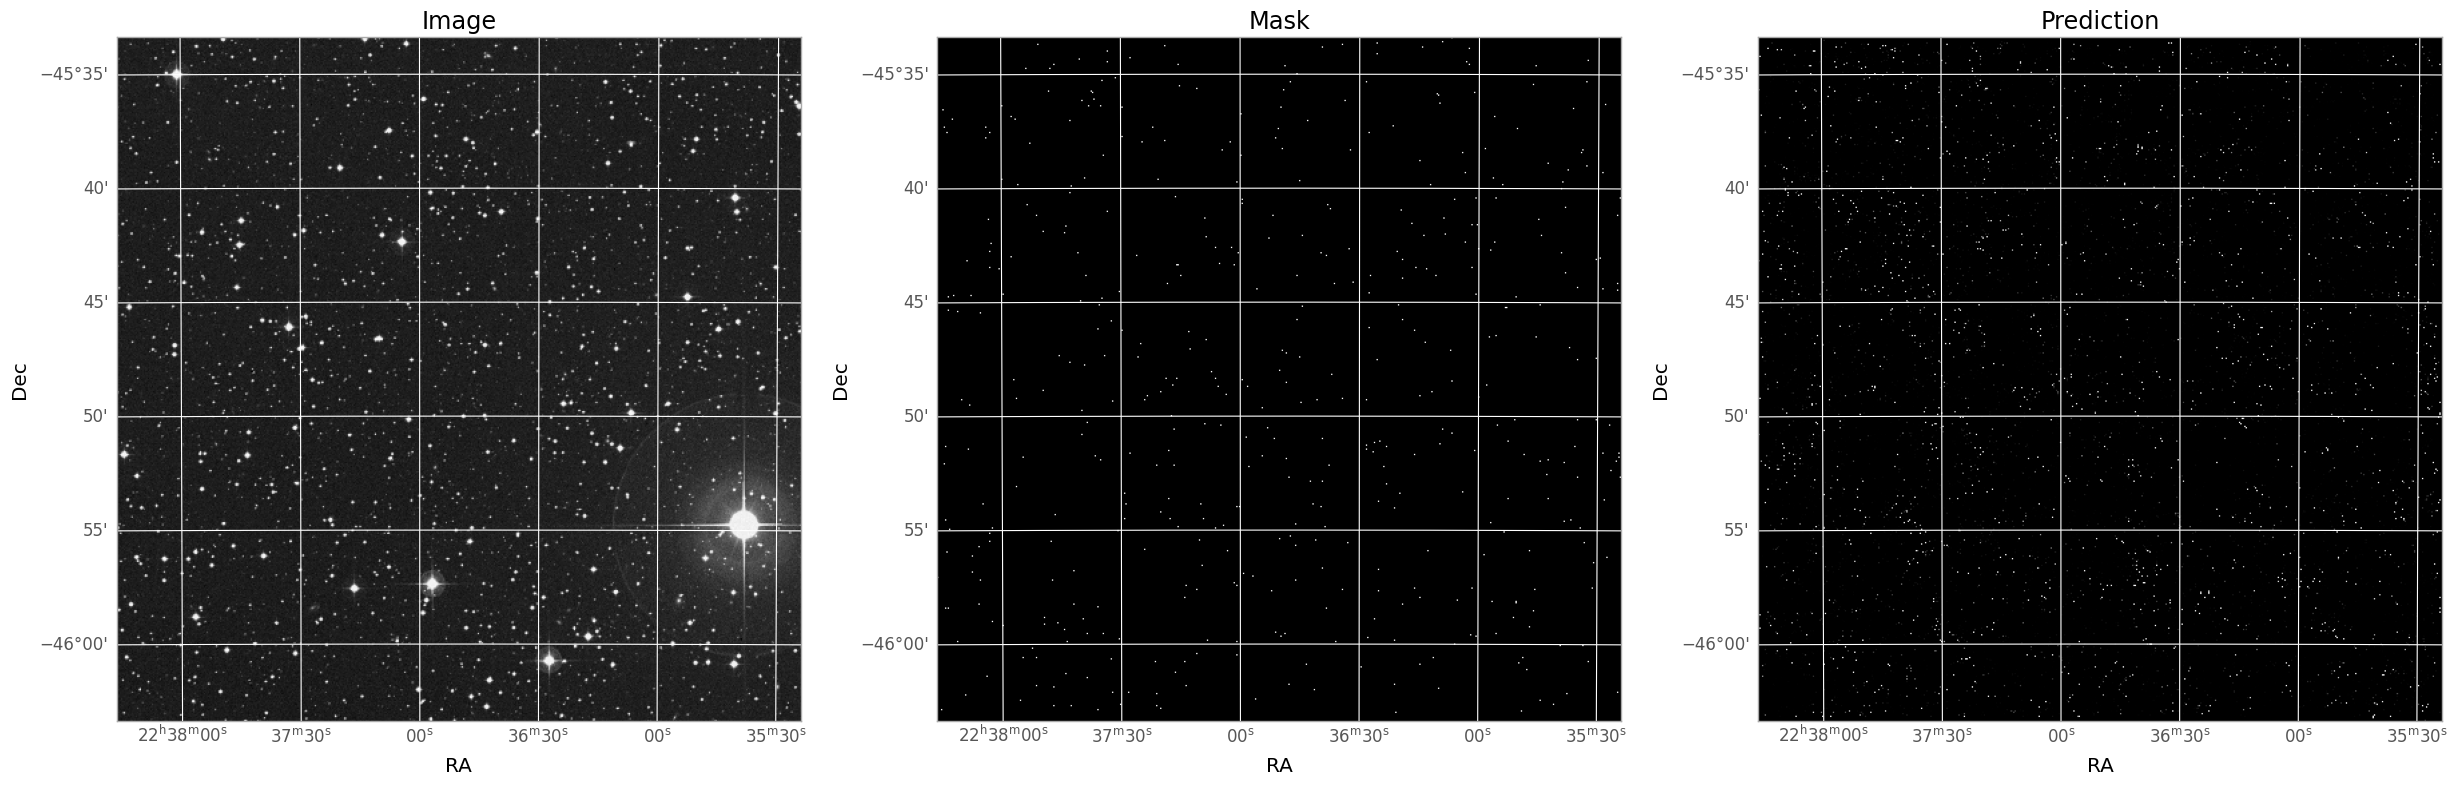

In [70]:
# Plot a random image mask prediction from the test set
selection = np.random.randint(0, len(test_images))
plot_image_mask_prediction(selection)

In [106]:
# Create a function to save the image, mask, and prediction to a file
def save_image_mask_prediction(selection = 0, ):
    """
    Saves the image, mask, and prediction for a given selection index to a file.
    Parameters:
    selection (int): The index of the image, mask, and prediction to save. Default is 0.
    file_path (str): The path to save the image, mask, and prediction to. Default is 'data["selection"].png'.
    The function extracts the image, mask, and prediction arrays using the provided selection index.
    It then creates a figure with three subplots, each displaying the image, mask, and prediction respectively.
    The subplots are saved to the specified file path.
    """
    image = extractImageArray('data/' + fits_files[selection]).squeeze()
    mask = test_masks[selection].squeeze()
    prediction = predictions[selection].squeeze()
    wcs = wcs_data[selection]

    print ('Choice: ', selection, 'File: ', fits_files[selection])

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask, cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(prediction, cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    file_path = 'images/predictions/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image, mask, and prediction to {file_path}')

    plt.savefig(file_path)

100
Choice:  100 File:  data14.fits
Saving image, mask, and prediction to images/predictions/data14.png


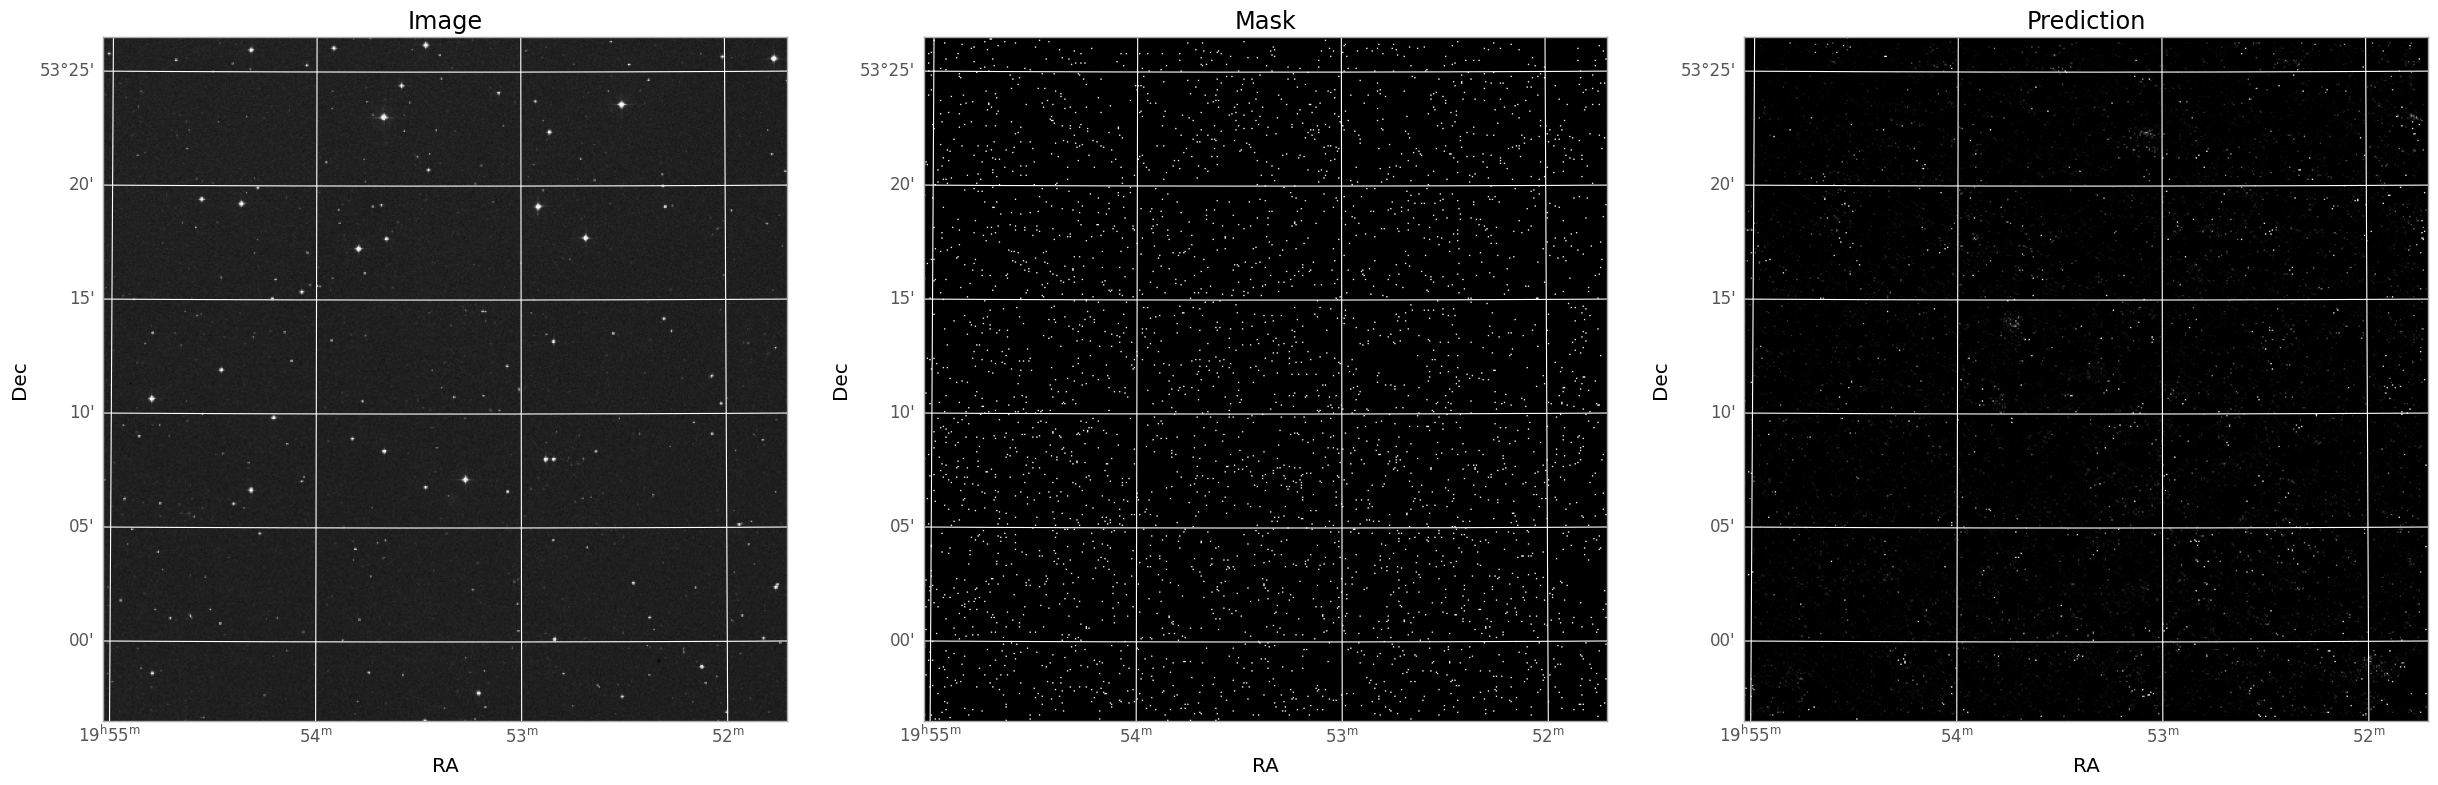

In [107]:
# Plot a random image mask prediction from the test set
choice = np.random.randint(0, len(test_images))
save_image_mask_prediction(selection = choice)

In [88]:
choice

112